In [13]:
import pandas as pd
names1880 = pd.read_csv(r'C:\\Users\\Константин\\Desktop\names\yob1880.txt', names =['name','sex','births'], engine='python')
names1880.births.sum()

201483

In [1]:
import os
os.getcwd()

'C:\\Users\\Константин'

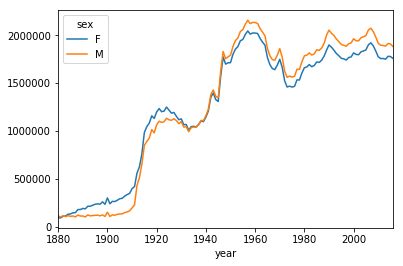

In [9]:
years = range(1880,2017)

pieces=[]
columns=['name','sex','births']

for year in years:
    path=r'C:\\Users\\Константин\\Desktop\names\yob%d.txt' %year
    frame=pd.read_csv(path,names=columns, engine='python')
    
    frame['year']=year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
data = pd.pivot_table(names, values = 'births', index='year', columns='sex', aggfunc='sum')
data.plot(kind='line')

In [36]:
def add_prop(group):
    births = group.births
    group['prop']=births/births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

def get_top(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped=names.groupby(['year','sex']).apply(get_top)

pieces=[]
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000=pd.concat(pieces, ignore_index=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


array([<matplotlib.axes._subplots.AxesSubplot object at 0x15F80130>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0AEEC650>], dtype=object)

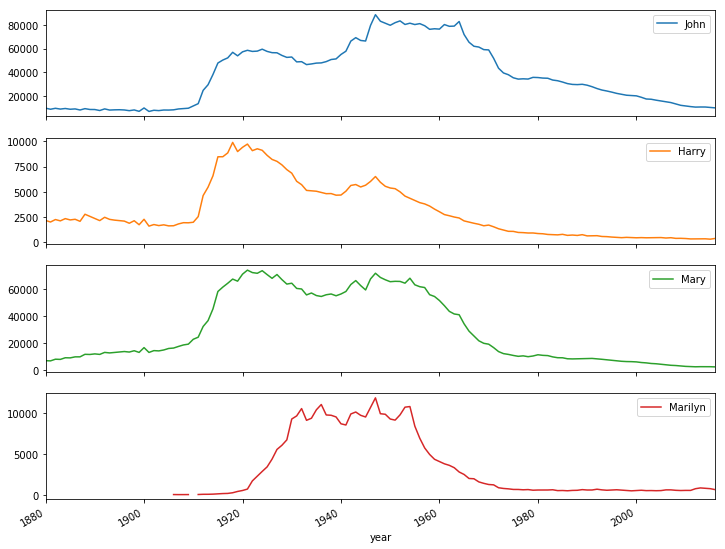

In [41]:
total_top_births=pd.pivot_table(top1000, values='births', index='year', columns='name',aggfunc='sum')
subset=total_top_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10))

In [6]:
%matplotlib inline